# Análisis Exploratorio

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data_vehiculos=pd.read_csv("vehiculos.csv")
data_vehiculos.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,VIN,drive,size,type,paint_color,county,state,lat,long,posting_date
0,7316814884,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8.0,gas,57923.0,...,3GTP1VEC4EG551563,NaN,NaN,pickup,white,NaN,al,32.590,-85.4800,2021-05-04T12:31:18-0500
1,7316814758,auburn,22590,2010.0,chevrolet,silverado 1500,good,8.0,gas,71229.0,...,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,NaN,al,32.590,-85.4800,2021-05-04T12:31:08-0500
2,7316814989,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8.0,gas,19160.0,...,3GCPWCED5LG130317,NaN,NaN,pickup,red,NaN,al,32.590,-85.4800,2021-05-04T12:31:25-0500
3,7316743432,auburn,30990,2017.0,toyota,tundra double cab sr,good,8.0,gas,41124.0,...,5TFRM5F17HX120972,NaN,NaN,pickup,red,NaN,al,32.590,-85.4800,2021-05-04T10:41:31-0500
4,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6.0,gas,128000.0,...,NaN,rwd,full-size,truck,black,NaN,al,32.592,-85.5189,2021-05-03T14:02:03-0500


### Cantidad de registros

In [5]:
data_vehiculos.shape

(9676, 22)

### Tipo de datos de las variables

In [6]:
data_vehiculos.dtypes

id                int64
region           object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
county          float64
state            object
lat             float64
long            float64
posting_date     object
dtype: object

### Identificación tipo de variables

In [7]:
continuas=[]
discretas=[]

for col in data_vehiculos.columns:
    if (data_vehiculos[col].dtypes in('float64','int64')) and (len(data_vehiculos[col].unique()))>30:
        continuas.append(col)
    else:
        discretas.append(col)

print("Continuas")
print(continuas)
print("")
print("Discretas")
print(discretas)

Continuas
['id', 'price', 'year', 'odometer', 'lat', 'long']

Discretas
['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color', 'county', 'state', 'posting_date']


### Análisis descriptivo

In [8]:
data_vehiculos.describe()

,id,price,year,cylinders,odometer,county,lat,long
count,9.676000e+03,9.676000e+03,9591.000000,6477.000000,9.648000e+03,0.0,9658.000000,9658.000000
mean,7.310134e+09,1.346347e+05,2011.900010,5.943338,8.662723e+04,NaN,43.511119,-111.774218
std,4.452201e+06,1.009153e+07,10.012438,1.598631,1.662376e+05,NaN,13.403450,29.123061
min,7.301592e+09,1.000000e+00,1922.000000,3.000000,0.000000e+00,NaN,-81.838232,-158.599600
25%,7.306636e+09,1.099100e+04,2010.000000,4.000000,2.761250e+04,NaN,33.468809,-149.847206
50%,7.310638e+09,2.099900e+04,2015.000000,6.000000,6.750000e+04,NaN,34.789530,-88.140898
75%,7.314144e+09,3.049600e+04,2018.000000,8.000000,1.232375e+05,NaN,61.161670,-86.653907
max,7.316894e+09,9.876543e+08,2022.000000,12.000000,1.000000e+07,NaN,64.993698,173.885502


### Identifiación de variables con valores nulos

<Axes: >

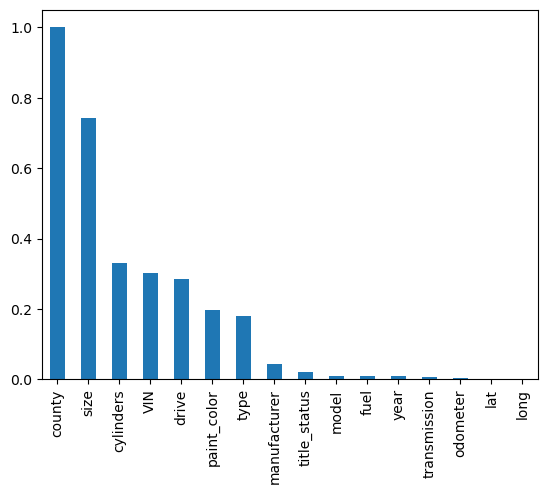

In [9]:
cols_con_na=[col for col in data_vehiculos.columns if data_vehiculos[col].isnull().mean()>0]

data_vehiculos[cols_con_na].isnull().mean().sort_values(ascending=False).plot.bar()


### Distribución de datos

id


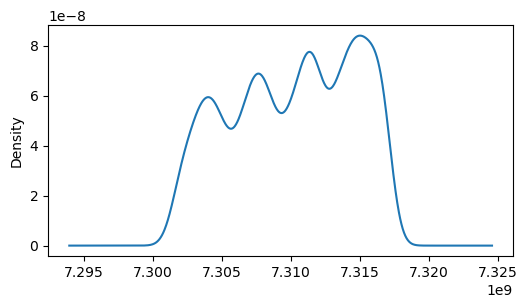

price


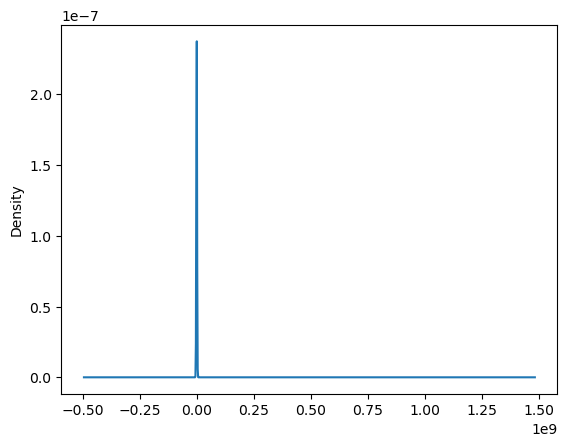

year


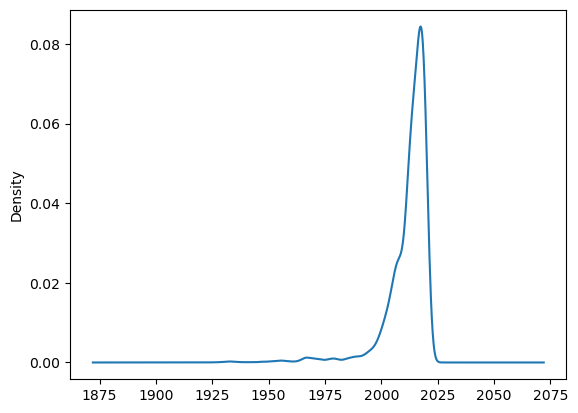

odometer


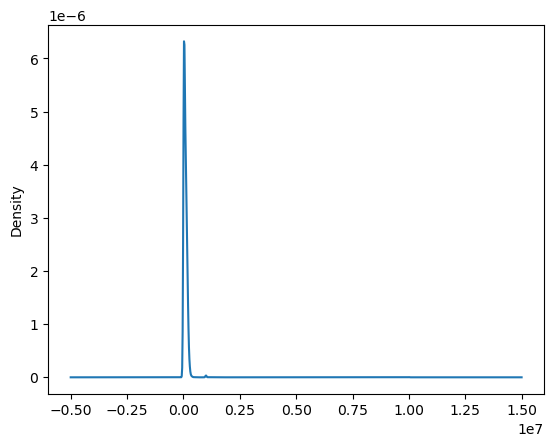

lat


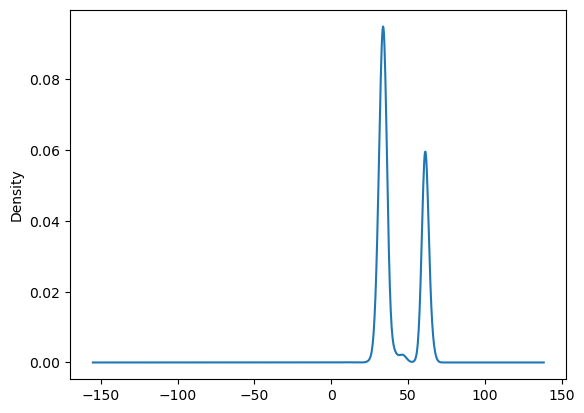

long


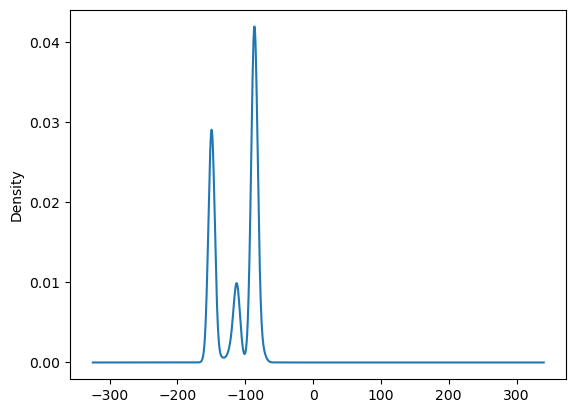

In [10]:
fig=plt.figure(figsize=(6,3))
ax=fig.add_subplot(111)


for col in continuas:
    print(col)
    data_vehiculos[col].plot(kind='kde')
    plt.show()

region


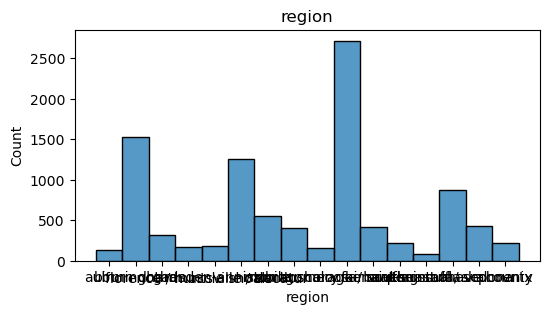

manufacturer


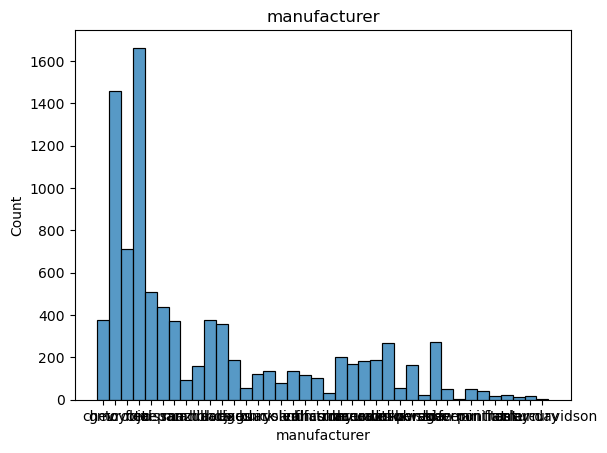

model


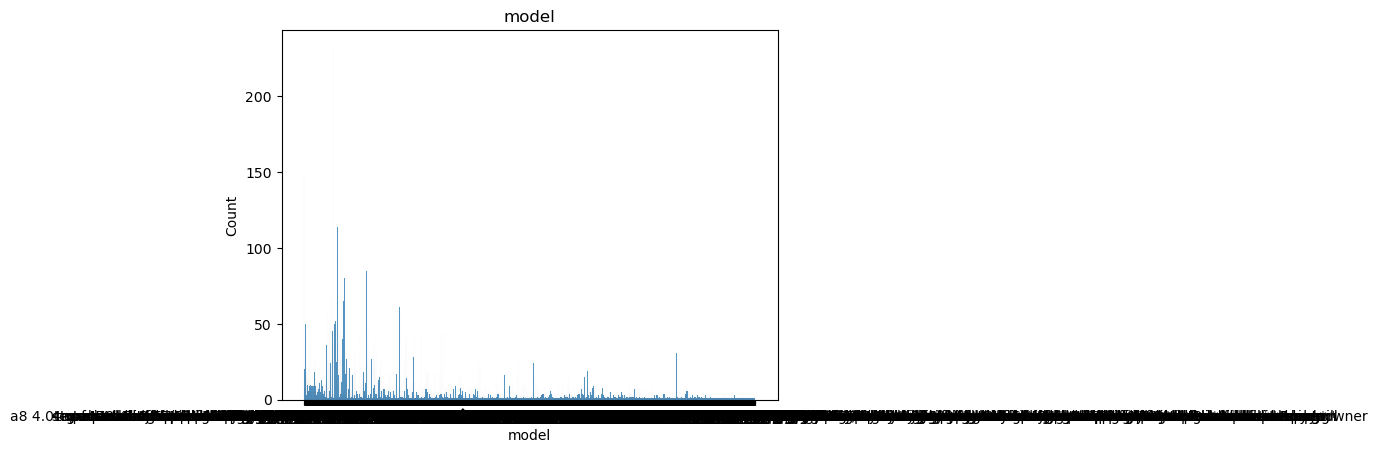

condition


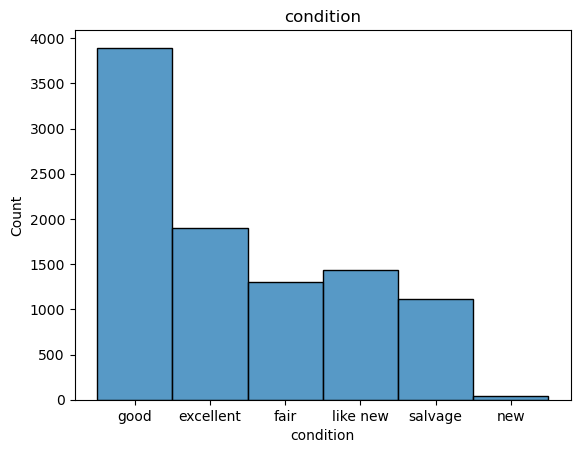

cylinders


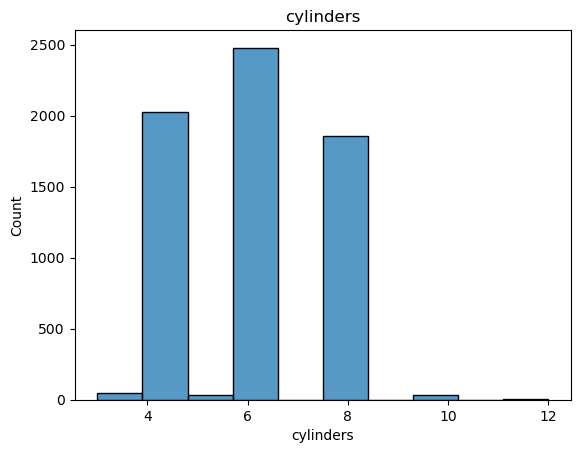

fuel


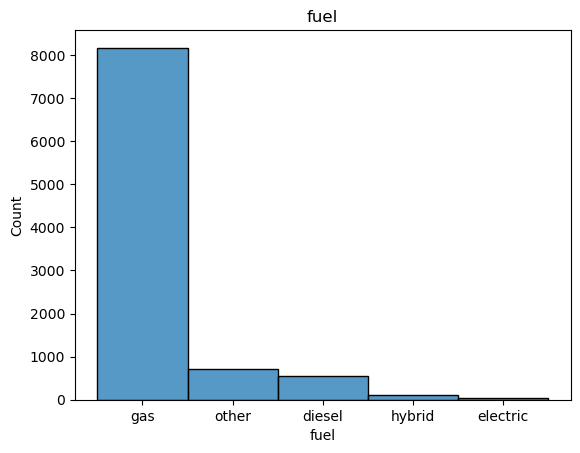

title_status


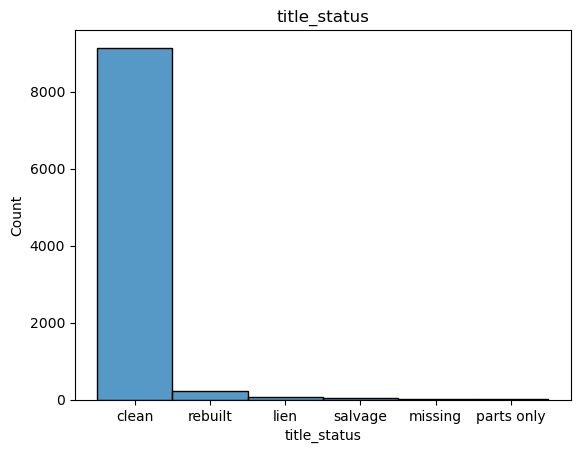

transmission


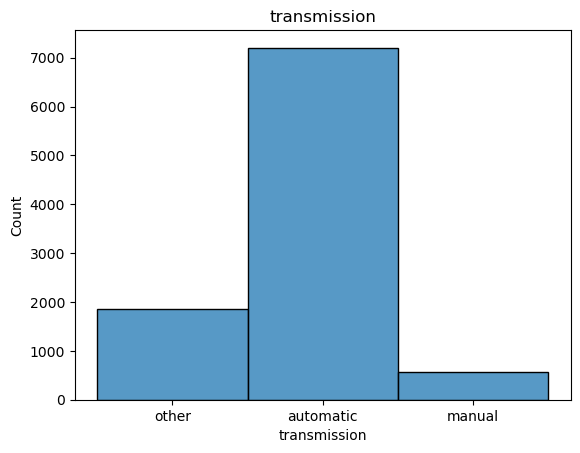

VIN


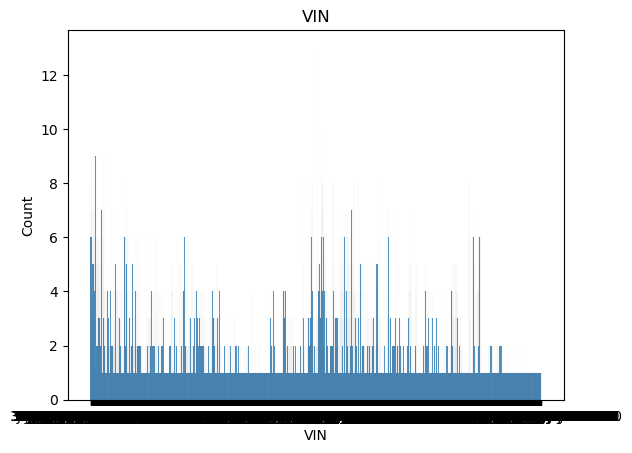

drive


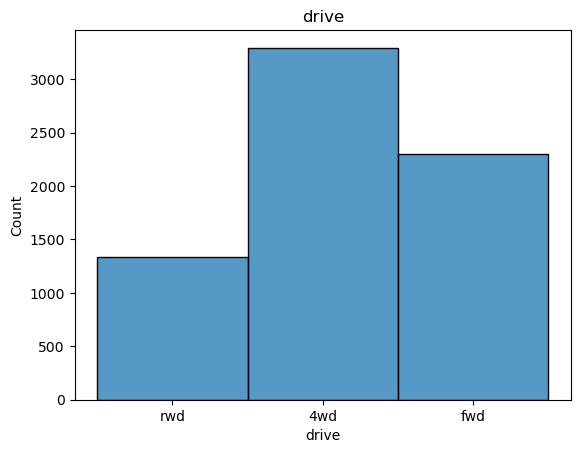

size


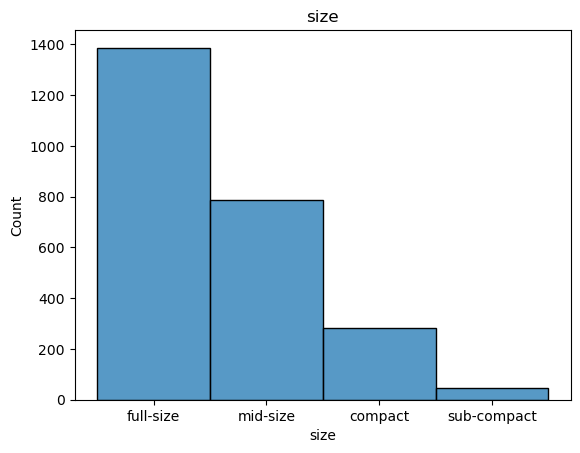

type


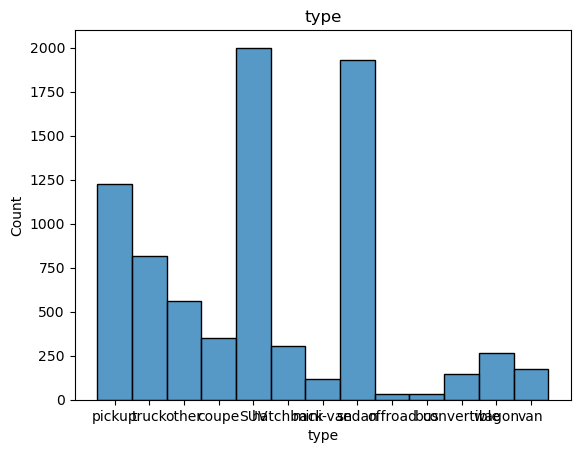

paint_color


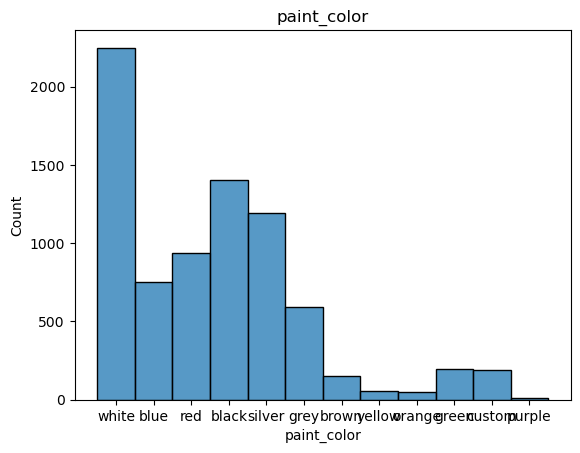

county


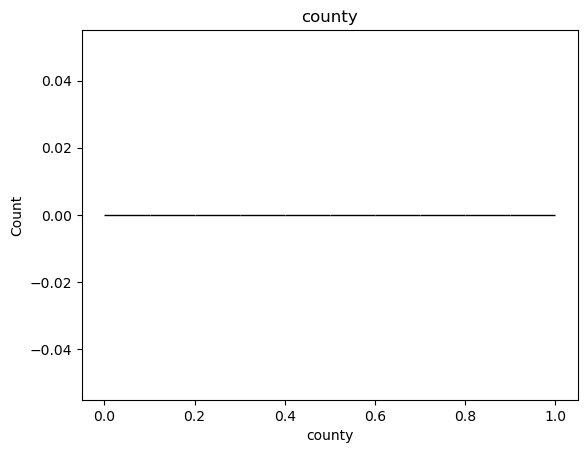

state


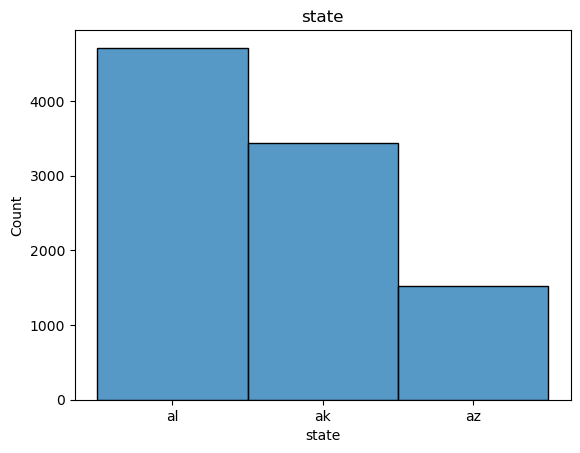

posting_date


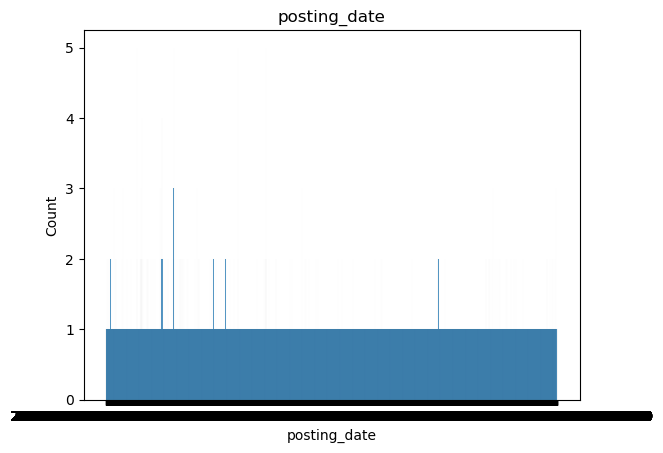

In [11]:
fig=plt.figure(figsize=(6,3))
ax=fig.add_subplot(111)


for col in discretas:
    print(col)
    sns.histplot(data=data_vehiculos[col], bins=10)
    plt.title(col)
    plt.show()

**Selección de variables para modelo**

*Variable a predecir*

In [13]:
data_vehiculos['condition'].unique()

array(['good', 'excellent', 'fair', 'like new', 'salvage', 'new'],
      dtype=object)

*Variables predictoras*

In [16]:
data_vehiculos['price'].value_counts()

price
24995    88
29995    84
29990    79
27990    77
5500     74
         ..
29357     1
8989      1
14299     1
6750      1
46863     1
Name: count, Length: 1787, dtype: int64

In [17]:
data_vehiculos['odometer'].value_counts()

odometer
10.0        47
200000.0    44
150000.0    29
100000.0    28
80000.0     25
            ..
148832.0     1
94315.0      1
79015.0      1
100929.0     1
16649.0      1
Name: count, Length: 4806, dtype: int64